<a href="https://colab.research.google.com/github/sunwoo1210/Deep-Learning-from-Scratch/blob/main/Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SGD 클래스로 구현

class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
# 모맨텀 구현

import numpy as np

class Momentum:
    def __init__(self, lr = 0.01, momentum= 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = { }
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

            for key in params.key():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] += self.v[key]

In [3]:
# AdaGrad 구현

class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = { }
            for key, val in params, items():
                self.h[key] = np.zeros_like(val)

            for key in params, key():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [4]:
# 은닉층의 활성화값 분포

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = { }

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

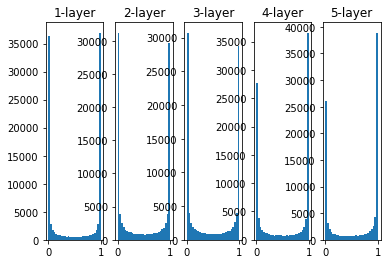

In [6]:
# 히스토그램 그리기

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0, 1))
plt.show()

In [9]:
# 가중치 초깃값 설정 변경
# w = np.random.randn(node_num, node_num) * 1

w = np.random.randn(node_num, node_num) * 0.01

In [10]:
# 노드값 재설정

node_num = 100
w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

In [11]:
# 드롭아웃 구현

class Dropout:
    def __init__(self, dropout_ration = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_fig = True):
        if train_fig:
            self.mask = np.random(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

In [12]:
# 하이퍼파라미터 최적화 구현

weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)